#### Name : SINU S MARIAM
#### Designation : Machine Learning Intern  
#### Organization : COGNIFYZ TECHNOLOGIES
#### Batch Date: 23/06/2024 to 23/09/2024
#### Task - Predict Restaurant Ratings
#### Problem Statement:
* Build a machine learning model to predict Restaurant Ratings based on certain features.
* Interpret the model's results and analyze the most influential features affecting restaurant ratings.

In [1]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
#importing libraries for visualisation
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
#importing Data
data_frame = pd.read_csv('C:/Users/Documents/COGNIFYZ/dataset/Dataset .csv')

####  Performing descriptive analysis. Understand the variables and their corresponding values. 

In [3]:
# Understanding the dimensions of train data
data_frame.shape

(9551, 21)

In [4]:
# Understanding the Data Variables
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
#Displaying columns
data_frame.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
# Show the top 10 Rows of data
data_frame.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
#understanding the numerical variables
data_frame.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [8]:
# Checking for any Duplicated Entries
data_frame.duplicated().sum()

0

In [9]:
#Detecting missing values
data_frame.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

* The column 'Cuisines' has 9 null values

In [10]:
# Drop null values
data_frame = data_frame.dropna()

In [11]:
# Identifing Categorical(Non-Numerical) Columns in Dataset
data_frame_cat=data_frame.select_dtypes(exclude=['float64','int64'])
data_frame_cat.columns

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')

In [12]:
# Identifing Numerical Columns in Dataset
data_frame_num=data_frame.select_dtypes(include=['float64','int64'])
data_frame_num.columns

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

In [13]:
# Find Unique values in each Categorical column and their count
cat_cols=['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text']
def num_count():
    for col in cat_cols:
        print('Name of the variable :', col)
        print(data_frame[col].value_counts(), '\n\n')
num_count()

Name of the variable : Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
The Town House Cafe          1
The G.T. Road                1
The Darzi Bar & Kitchen      1
Smoke On Water               1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7437, dtype: int64 


Name of the variable : City
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lincoln              1
Lakeview             1
Lakes Entrance       1
Inverloch            1
Panchkula            1
Name: City, Length: 140, dtype: int64 


Name of the variable : Address
Dilli Haat, INA, New Delhi                                                   11
Sector 41, Noida                                                             11
Greater Kailash (GK) 1, New Delhi                     

In [14]:
# Find Unique values in each Non-Categorical column and their count
numerical_cols=['Country Code', 'Longitude', 'Latitude', 'Average Cost for two',
       'Price range', 'Aggregate rating', 'Votes']
def num_count():
    for col in numerical_cols:
        print('Name of the variable :', col)
        print(data_frame[col].value_counts(), '\n\n')
num_count()

Name of the variable : Country Code
1      8652
216     425
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64 


Name of the variable : Longitude
0.000000     498
77.353663     19
77.230412     12
77.088688     10
77.251426      9
            ... 
77.134037      1
77.228705      1
77.230456      1
77.229064      1
29.026016      1
Name: Longitude, Length: 8111, dtype: int64 


Name of the variable : Latitude
0.000000     498
28.574309     16
28.551456      9
28.574300      9
28.597103      8
            ... 
28.641341      1
28.644472      1
28.648229      1
28.644812      1
40.984776      1
Name: Latitude, Length: 8668, dtype: int64 


Name of the variable : Average Cost for two
500       900
300       897
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: Average Cost

#### Data Visualization

##### *  Data Visualization helps to show how the different factors affect the Aggregate Ratings

<Axes: >

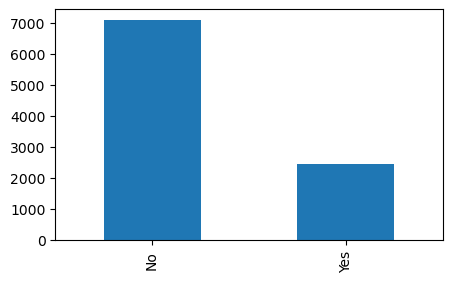

In [17]:
# Histogram of "Has Online delivery"
data_frame["Has Online delivery"].value_counts().plot(kind="bar",figsize=(5,3))

<Axes: >

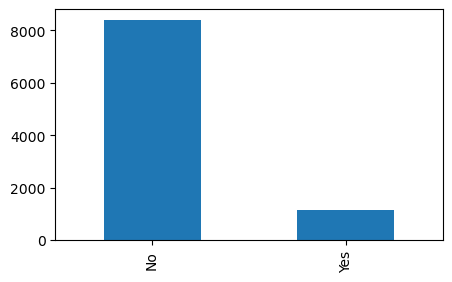

In [18]:
# Histogram of 'Has Table booking'
data_frame['Has Table booking'].value_counts().plot(kind="bar",figsize=(5,3))

<Axes: >

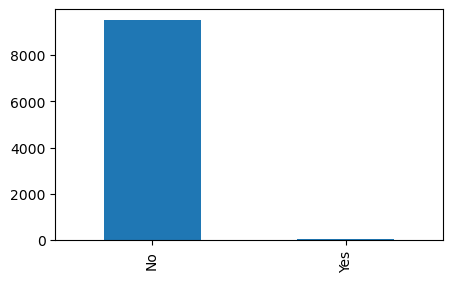

In [19]:
# Histogram of 'Is delivering now'
data_frame['Is delivering now'].value_counts().plot(kind="bar",figsize=(5,3))

<Axes: >

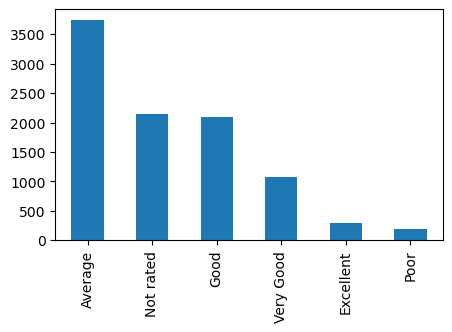

In [20]:
# Histogram of Rating text
data_frame['Rating text'].value_counts().plot(kind="bar",figsize=(5,3))

#### Heat Map

In [21]:
# find correlation between variables in data set for plotting heatmap
df_corr=data_frame.corr()

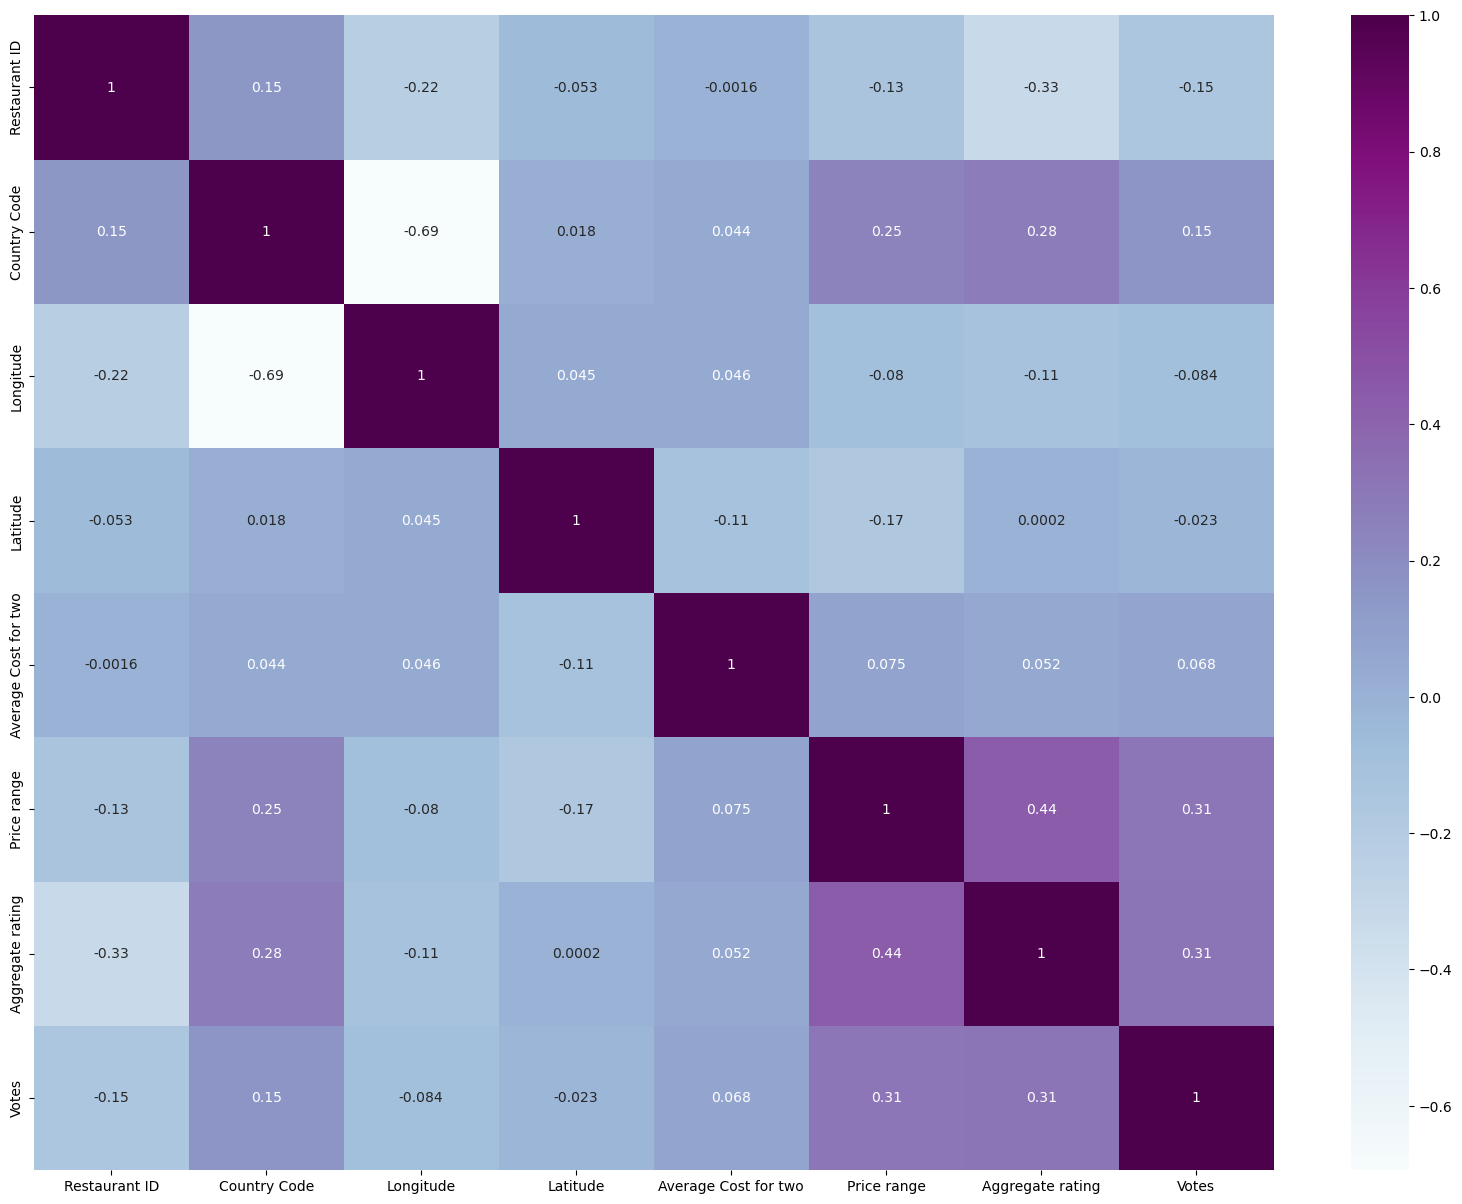

In [22]:
plt.figure(figsize=(20,15))
sns.heatmap(df_corr,annot=True,cmap="BuPu")
plt.show()

 * Variables Price range, Votes and Country Code have better correlation values (above 0.2) with  target 'Aggregate rating' variable
 * Factor 'Average Cost for two' is having low value (0.052) with  target 'Aggregate rating' variable
 * Latitude and Longitude have very very low correlation or negative correlation with target 'Aggregate rating' variable

#### Dropping unwanted Columns

* Columns 'Longitude' and 'Latitude' can be dropped because of their very low correlation values with target variable'Aggregate rating'. 
* Also there are details from 15 countries (15 different country codes are available), and geographical data can be taken into consideration from columns 'City' and 'Locality'
* The column 'Address' can be dropped because its content is available in columns such as 'City' and 'Locality'
* The column 'Locality Verbose' can be dropped since its entries are a combination of columns 'City' and 'Locality'
* The column 'Restaurant ID' can be dropped because it doesnot have relavant Info
* The column 'Switch to order menu' can be dropped because it has only 1 unique value
* The column 'Rating text' and 'Rating color' have same no: of Unique values. So either one can be dropped.

In [23]:
# Drop unwanted columns 
data_frame.drop(columns=['Restaurant ID','Address','Locality Verbose','Rating color','Longitude', 'Latitude', 'Switch to order menu','Currency'],axis=1,inplace=True)

####  Scatter Plot 

<Axes: xlabel='Votes', ylabel='Aggregate rating'>

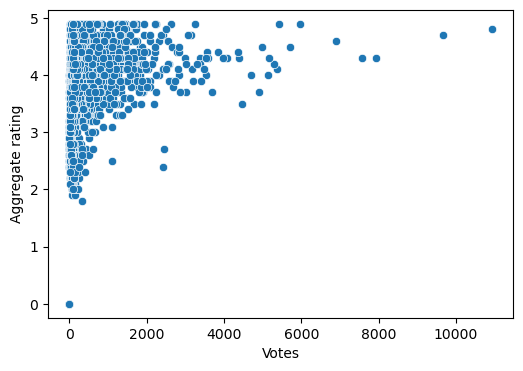

In [26]:
#SCATTER PLOT Aggregate Ratings  vs Votes
plt.figure(figsize=(6,4))
sns.scatterplot(data=data_frame,x=data_frame['Votes'],y=data_frame['Aggregate rating'])

<Axes: xlabel='Average Cost for two', ylabel='Aggregate rating'>

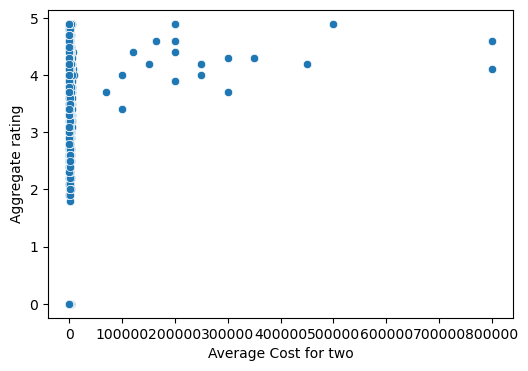

In [27]:
#SCATTER PLOT Aggregate Ratings  vs Average Cost for two
plt.figure(figsize=(6,4))
sns.scatterplot(data=data_frame,x=data_frame['Average Cost for two'],y=data_frame['Aggregate rating'])

<Axes: >

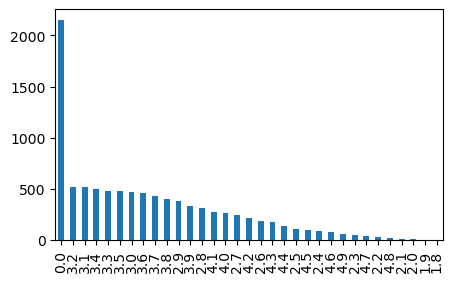

In [28]:
# Plotting histogram of "Aggregate rating" variable
data_frame["Aggregate rating"].value_counts().plot(kind="bar",figsize=(5,3))

In [29]:
# For labelling the categorical columns,One Hot encoding is permormed 
data_frame= pd.get_dummies(data_frame, columns = ['Restaurant Name', 'City', 'Locality',
       'Cuisines', 'Has Table booking', 'Has Online delivery',
       'Is delivering now','Rating text'])
data_frame.head(5)

,Country Code,Average Cost for two,Price range,Aggregate rating,Votes,Restaurant Name_#45,Restaurant Name_#Dilliwaala6,Restaurant Name_#InstaFreeze,Restaurant Name_#OFF Campus,Restaurant Name_#Urban Caf��,...,Has Online delivery_No,Has Online delivery_Yes,Is delivering now_No,Is delivering now_Yes,Rating text_Average,Rating text_Excellent,Rating text_Good,Rating text_Not rated,Rating text_Poor,Rating text_Very Good
0,162,1100,3,4.8,314,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
1,162,1200,3,4.5,591,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
2,162,4000,4,4.4,270,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3,162,1500,4,4.9,365,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
4,162,1500,4,4.8,229,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0


#### Splitting the combined dataset for training and testing

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
#First step in building the model is to identify the Feature(Input) variables and Target (Output) variable
features = data_frame.drop(['Aggregate rating'], axis=1)
target = data_frame['Aggregate rating']

In [32]:
# Splitting data for training the model and testing the model
# train size taken as 0.8
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = .8)
# Dimensions of Train and Test Data sets
print('Train set of features: ', X_train.shape)
print('Test set of features: ', X_test.shape)
print('Target for train: ', y_train.shape)
print('Target for test: ', y_test.shape)

Train set of features:  (7633, 10624)
Test set of features:  (1909, 10624)
Target for train:  (7633,)
Target for test:  (1909,)


### Building the Models

###  1. Linear Regression Model

In [33]:
# Learn the Linear Regression Model on train data
from sklearn.linear_model import LinearRegression
my_model_LR=LinearRegression()

In [34]:
# Fitting the model in train data set ie the Linear Regression Model should learn from the on Train Data
my_model_LR.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predicting 'Aggregate Ratings' from Feature Test values
y_pred_LR = my_model_LR.predict(X_test)
y_pred_LR 

array([ 3.62995821, -0.03209987,  2.94383401, ...,  4.15235805,
        2.45931594, -0.08755458])

#### Test the model

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
# Compare the predicted values with the true values
mean_squared_error(y_pred_LR, y_test)

0.0749549852929335

##### Coefficient of Determination or R Squared Value (r2)

In [38]:
from sklearn.metrics import r2_score

In [39]:
# find Coefficient of Determination or R Squared Value (r2)
r2_score(y_test,y_pred_LR)

0.9667450856870572

### 2. Decision Tree model

In [40]:
from sklearn.tree import DecisionTreeRegressor
my_model_DT=DecisionTreeRegressor(max_depth=10,random_state = 0)

In [41]:
# Fitting the DT model in train data set 
my_model_DT=my_model_DT.fit(X_train, y_train)

In [42]:
# Predicting 'Aggregate Ratings' from Feature Test values
y_pred_DT = my_model_DT.predict(X_test)
y_pred_DT

array([3.6918    , 0.        , 2.82857143, ..., 4.13297587, 3.06054104,
       0.        ])

#### Testing the Decision Tree Regression Model

In [43]:
# Compare the predicted values with the true values
mean_squared_error(y_pred_DT, y_test)

0.03259748217852152

In [44]:
# find Coefficient of Determination or R Squared Value (r2)
r2_score(y_test,y_pred_DT)

0.9855376333885211

 * Decision Tree Regression has high Coefficient of Determination or R Squared Value (r2) compared to Linear  Regression Model
 * Decision Tree Regression also hasvery low Mean Squared Error

-------------------------------THE END----------------------------------